In [37]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from bs4 import BeautifulSoup

def foot_stat_scraper(file_name):

    with open(file_name) as page:
        soup = BeautifulSoup(page, "html.parser")
        soup = soup.find('tbody')
    
    pl_num = soup.find_all('div', {'class': 'rn_nummer'})
    pl_num_list = []
    for i in pl_num:
        pl_num_list.append(i.text)

    pl_name = soup.find_all('td', {'class': 'hide'})
    pl_name_list = []
    for i in pl_name:
        pl_name_list.append(i.text)

    pl_birth = soup.find_all('td', {'class': 'zentriert'})
    pl_birth_list = []
    for i in pl_birth:
        pl_birth_list.append(i.text)

    for i in pl_birth_list:
        if len(i) < 10:
            pl_birth_list.remove(i)
    for i in pl_birth_list:
        if len(i) < 10:
            pl_birth_list.remove(i)

    pl_price = soup.find_all('td', {'class': 'rechts'})
    pl_price_list = []
    for i in pl_price:
        pl_price_list.append(i.text)

    age_list = []
    for key, val in enumerate(pl_birth_list):
        age_list.append(val[-3:-1])
        pl_birth_list[key] = val[0:-5]

    pl_name_series = Series(pl_name_list)
    pl_num_series = Series(pl_num_list)
    pl_birth_series = Series(pl_birth_list) 
    pl_price_series = Series(pl_price_list) 
    pl_age_series = Series(age_list)
    pl_birth_series = pd.to_datetime(pd.Series(pl_birth_series))
    
    for key, price in enumerate(pl_price_series):
        price = price.replace('m', '0000')
        price = price.replace('.', '')
        price = price.replace('k', '000')
        price = price.replace('€', '')
        pl_price_series[key] = price

    team_info = pd.concat([pl_name_series, pl_num_series, pl_birth_series, pl_age_series, pl_price_series], axis=1)
    team_info.columns = ['Name', 'Number', 'Birth Date', 'Age', 'Price']
    team_info['Age'] = team_info['Age'].astype('int32')
    team_info['Price'] = team_info['Price'].astype('int32')/1000000
    return team_info

teams_list = ['Juve.html', 'inter.html']
seria_a_df = pd.DataFrame()
for team in teams_list:
    df = pd.DataFrame(foot_stat_scraper(str(team)))
    df['Team'] = team[0:-5]

    seria_a_df = seria_a_df.append(df, ignore_index=True)

#
print (seria_a_df)

                     Name Number Birth Date  Age  Price   Team
0       Wojciech Szczesny      1 1990-04-18   29   40.0   Juve
1        Gianluigi Buffon     77 1978-01-28   42    1.0   Juve
2         Carlo Pinsoglio     31 1990-03-16   29    0.5   Juve
3        Matthijs de Ligt      4 1999-08-12   20   75.0   Juve
4           Merih Demiral     28 1998-03-05   22   30.0   Juve
5        Leonardo Bonucci     19 1987-05-01   32   25.0   Juve
6          Daniele Rugani     24 1994-07-29   25   15.0   Juve
7       Giorgio Chiellini      3 1984-08-14   35    5.0   Juve
8             Alex Sandro     12 1991-01-26   29   50.0   Juve
9                  Danilo     13 1991-07-15   28   20.0   Juve
10      Mattia De Sciglio      2 1992-10-20   27   12.0   Juve
11         Miralem Pjanic      5 1990-04-02   29   65.0   Juve
12      Rodrigo Bentancur     30 1997-06-25   22   50.0   Juve
13           Aaron Ramsey      8 1990-12-26   29   35.0   Juve
14          Adrien Rabiot     25 1995-04-03   24   32.0

In [33]:
seria_a_df['Price'].min()

100

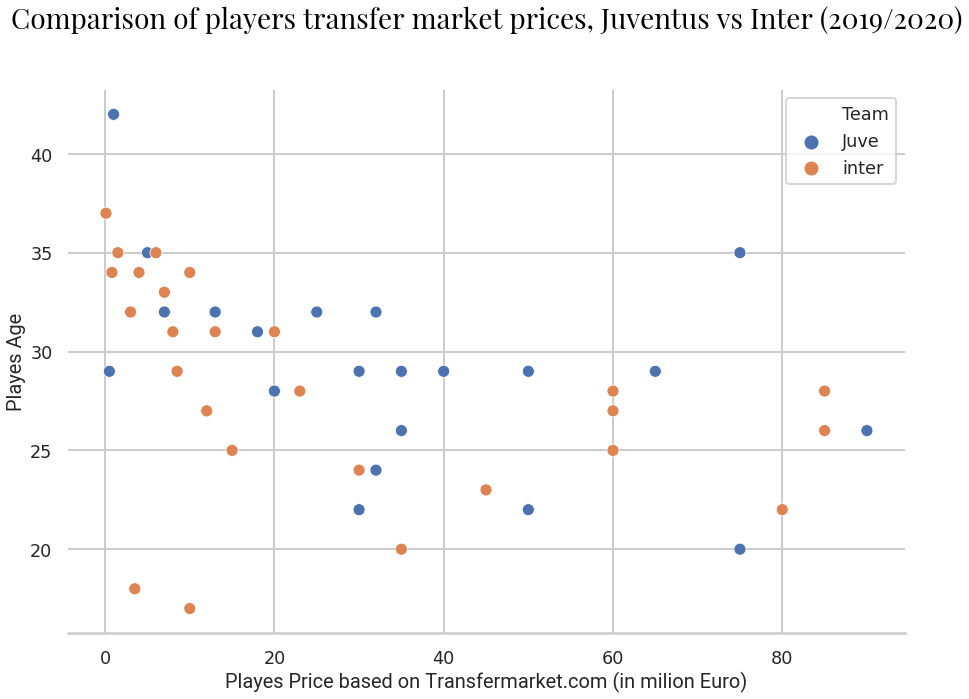

In [45]:

import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='PlayfairDisplay-Regular.ttf', size=28)

subtitle_font = fm.FontProperties(fname='Roboto-Regular.ttf', size=20)

lable_font = fm.FontProperties(fname='Roboto-Regular.ttf', size=20)

# Color Themes
color_bg = '#FEF1E5'
darker_highlight = '#FBEADC'
lighter_highlight = '#ffffff'

plt.figure(figsize=(15,10))

fontdict={'fontsize': 24,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

sns.set_context("poster", font_scale=0.8)


ax = sns.scatterplot(y="Age", x='Price', hue="Team", data = seria_a_df)
#ax = sns.scatterplot(x="Avg_temp", y="F_rate", hue="Class", data=temp_fert_2013)


ax.set_title('Comparison of players transfer market prices, Juventus vs Inter (2019/2020)', fontproperties=heading_font, color="black",
         position=(0.5,1.1));

#plt.text(x=31.45, y=8.2, s='The vertical axis shows fertility rate. The horizontal axis shows average temperature in a year in F.',fontproperties=subtitle_font, horizontalalignment='right',color='#524939')

plt.xlabel('Playes Price based on Transfermarket.com (in milion Euro)', fontproperties=lable_font)
plt.ylabel('Playes Age', fontproperties=lable_font)
sns.despine(left=True)


#plt.savefig('wieght_box.png')